In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("ICAR-AWS Data_Modified_Req_Features.csv")

In [26]:
df.head(2)

,TIMESTAMP,AVGT,AVGP,MAXP,MINP,MINT,MAXT,MINU,WINDSPD
0,2022-02-01,33.176830,1006.039708,1008.148,1003.936,30.26416,36.99384,64.79,0.878080
1,2022-02-02,33.257005,1006.893125,1009.275,1004.576,30.11134,37.36093,52.85,1.096157


In [5]:
df.shape

(303, 20)

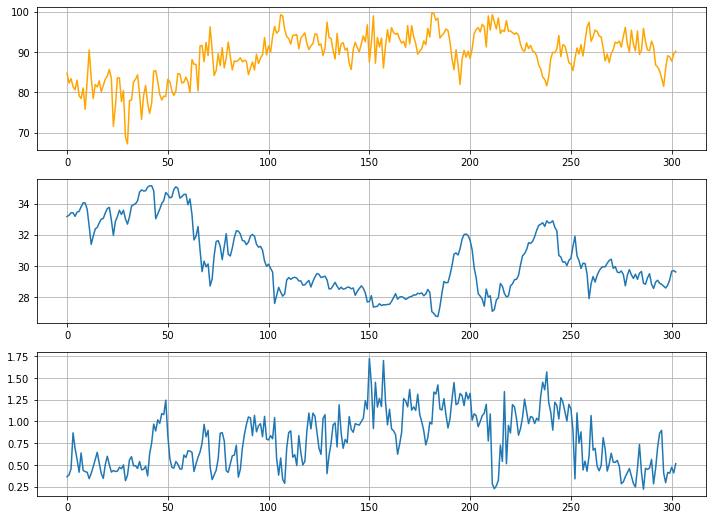

In [24]:
# fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(12,9))
# ax1.grid()
# ax2.grid()
# ax3.grid()
# ax1.plot(df.RH,color='orange')
# ax2.plot(df.T_Avg)
# ax3.plot(df.WS_ms_Avg)

In [27]:
df.drop("TIMESTAMP",axis=1,inplace=True)

In [30]:
df.head(2)

,AVGT,AVGP,MAXP,MINP,MINT,MAXT,MINU,WINDSPD
0,33.176830,1006.039708,1008.148,1003.936,30.26416,36.99384,64.79,0.878080
1,33.257005,1006.893125,1009.275,1004.576,30.11134,37.36093,52.85,1.096157


### KMO TEST

In [28]:
def kmo(dataset_corr):
    
    import numpy as np
    import math as math
    import collections
    
    r"""
    
    Parameters
    ----------
    dataset_corr : ndarray
        Array containing dataset correlation
        
    Returns
    -------
    out : namedtuple
        The function outputs the test value (value), the test value per variable (per_variable)
       
        Ex:
        Out[30]: 
        KMO_Test_Results(value=0.798844102413, 
        per_variable=
        Q1     0.812160468405
        Q2     0.774161264483
        Q3     0.786819432663
        Q4     0.766251123086
        Q5     0.800579196084
        Q6     0.842927745203 
        Q7     0.792010173432 
        Q8     0.862037322891
        Q9     0.714795031915 
        Q10    0.856497242574
        dtype: float64)
    
    References
    ----------    
    [1] Kaiser, H. F. (1970). A second generation little jiffy. Psychometrika, 35(4), 401-415.
    [2] Kaiser, H. F. (1974). An index of factorial simplicity. Psychometrika, 39(1), 31-36.
    [3] R. Sarmento and V. Costa, (2017)
    "Comparative Approaches to Using R and Python for Statistical Data Analysis", IGI-Global
    
    Examples
    --------
    illustration how to use the function.
    
    >>> kmo_test(survey_data.corr(method="spearman"))
         
        KMO_Test_Results(value=0.798844102413, 
        per_variable=
        Q1     0.812160468405
        Q2     0.774161264483
        Q3     0.786819432663
        Q4     0.766251123086
        Q5     0.800579196084
        Q6     0.842927745203 
        Q7     0.792010173432 
        Q8     0.862037322891
        Q9     0.714795031915 
        Q10    0.856497242574
        dtype: float64) 
"""
    
    

    #KMO Test
    #inverse of the correlation matrix
    corr_inv = np.linalg.inv(dataset_corr)
    nrow_inv_corr, ncol_inv_corr = dataset_corr.shape
    
    #partial correlation matrix
    A = np.ones((nrow_inv_corr,ncol_inv_corr))
    for i in range(0,nrow_inv_corr,1):
        for j in range(i,ncol_inv_corr,1):
          #above the diagonal
            A[i,j] = - (corr_inv[i,j]) / (math.sqrt(corr_inv[i,i] * corr_inv[j,j]))
          #below the diagonal
            A[j,i] = A[i,j]
    
  #transform to an array of arrays ("matrix" with Python)
    dataset_corr = np.asarray(dataset_corr)
        
  #KMO value
    kmo_num = np.sum(np.square(dataset_corr)) - np.sum(np.square(np.diagonal(dataset_corr)))
    kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
    kmo_value = kmo_num / kmo_denom
    
    
    kmo_j = [None]*dataset_corr.shape[1]
  #KMO per variable (diagonal of the spss anti-image matrix)
    for j in range(0, dataset_corr.shape[1]):
        kmo_j_num = np.sum(dataset_corr[:,[j]] ** 2) - dataset_corr[j,j] ** 2
        kmo_j_denom = kmo_j_num + np.sum(A[:,[j]] ** 2) - A[j,j] ** 2
        kmo_j[j] = kmo_j_num / kmo_j_denom

    
    Result = collections.namedtuple("KMO_Test_Results", ["value", "per_variable"])   
    
  #Output of the results - named tuple    
    return Result(value=kmo_value,per_variable=kmo_j)

In [29]:
kmo(df.corr(method="spearman"))

KMO_Test_Results(value=0.6735667141877613, per_variable=[0.6040031265045013, 0.6271687306711512, 0.7270500504551073, 0.7115805532368108, 0.5940607263255216, 0.6285944939074782, 0.9588419763864169, 0.8786591984356412])

### EMD 

In [32]:
import emd

imf = emd.sift.sift(df.AVGT.to_numpy())

In [33]:
imf.shape

(303, 5)

<AxesSubplot:xlabel='Time (samples)'>

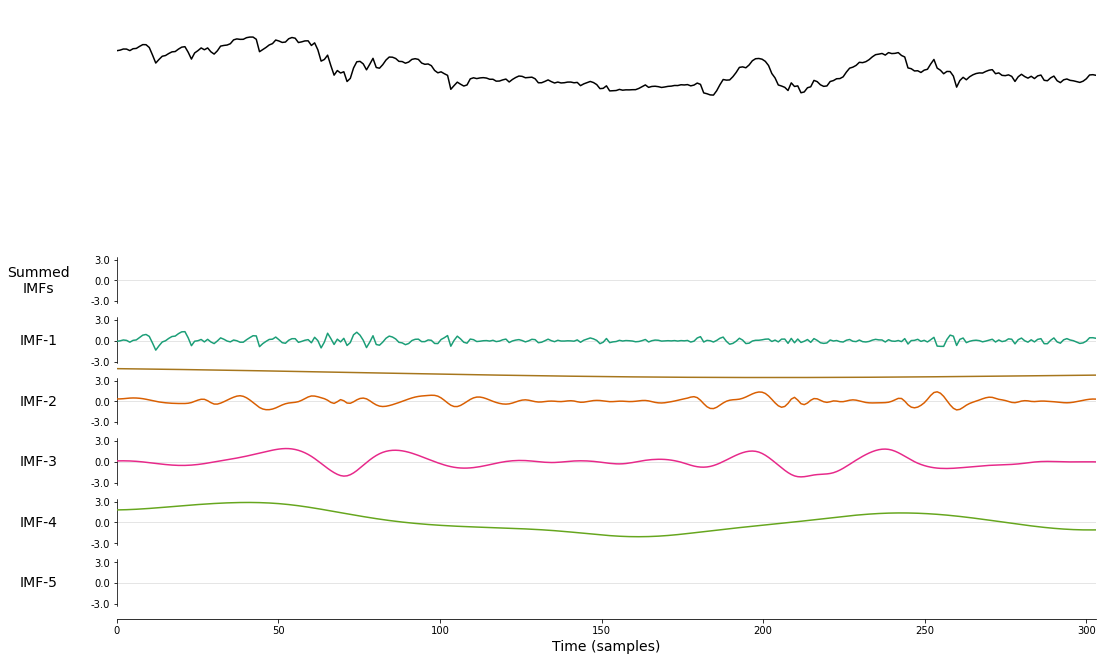

In [34]:
emd.plotting.plot_imfs(imf)

In [35]:
new_df = pd.DataFrame(imf,columns=["imf_1","imf_2","imf_3","imf_4","imf_5"])

In [38]:
new_df.head(2)

,imf_1,imf_2,imf_3,imf_4,imf_5
0,-0.070009,0.344673,0.139333,1.799885,30.962947
1,-0.006770,0.350896,0.147220,1.808093,30.957566


In [39]:
new_df["avg_t"] = df.AVGT

In [40]:
new_df.head(2)

,imf_1,imf_2,imf_3,imf_4,imf_5,avg_t
0,-0.070009,0.344673,0.139333,1.799885,30.962947,33.176830
1,-0.006770,0.350896,0.147220,1.808093,30.957566,33.257005


<AxesSubplot:>

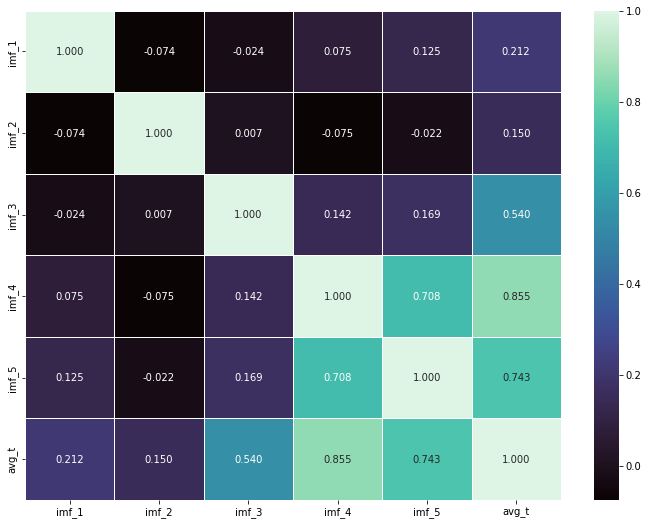

In [41]:
plt.figure(figsize = (12,9))
sns.heatmap(new_df.corr('pearson'),cmap="mako",fmt='.3f',annot = True,linewidths=0.5,linecolor="white")

In [42]:
df["avg_t_imf_3"] = new_df.imf_3
df["avg_t_imf_4"] = new_df.imf_4
df["avg_t_imf_5"] = new_df.imf_5

### Training Dataset

In [44]:
# df.to_csv("avg_temp_our_dataset.csv",index=False)

In [46]:
df_for_training = pd.read_csv("avg_temp_our_dataset.csv")

In [117]:
df_for_training.dtypes

AVGT           float64
AVGP           float64
MAXP           float64
MINP           float64
MINT           float64
MAXT           float64
MINU           float64
WINDSPD        float64
avg_t_imf_3    float64
avg_t_imf_4    float64
avg_t_imf_5    float64
dtype: object

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [49]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 7  # Number of past days we want to use to predict the future.

In [50]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [51]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (296, 7, 11).
trainY shape == (296, 1).


### Modelling and Training

In [52]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout

In [53]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu',return_sequences=False))
# model.add(Dropout(0.2))
model.add(Dense(trainX.shape[2]))

opt = keras.optimizers.Adam(learning_rate=0.1)
# optimizer2 = keras.optimizers.Adam(lr=0.1)
# optimizer3 = tf.keras.optimizers.Adam(lr=0.1)
# optimizer4 = tf.keras.optimizers.Adam(lr=0.1)

model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             12400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 11)                561       
Total params: 53,361
Trainable params: 53,361
Non-trainable params: 0
_________________________________________________________________


In [54]:
history1 = model.fit(trainX, trainY, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/50
17/17 [==============================] - 9s 120ms/step - loss: 3330535.2500 - val_loss: 0.0174
Epoch 2/50
17/17 [==============================] - 1s 85ms/step - loss: 0.1290 - val_loss: 0.0092
Epoch 3/50
17/17 [==============================] - 1s 83ms/step - loss: 0.0924 - val_loss: 0.0743
Epoch 4/50
17/17 [==============================] - 1s 85ms/step - loss: 0.0831 - val_loss: 0.0224
Epoch 5/50
17/17 [==============================] - 1s 87ms/step - loss: 0.0391 - val_loss: 0.0046
Epoch 6/50
17/17 [==============================] - 1s 81ms/step - loss: 0.0418 - val_loss: 0.0435
Epoch 7/50
17/17 [==============================] - 1s 81ms/step - loss: 0.0438 - val_loss: 0.0140
Epoch 8/50
17/17 [==============================] - 1s 85ms/step - loss: 0.0302 - val_loss: 0.0160
Epoch 9/50
17/17 [==============================] - 2s 87ms/step - loss: 0.0299 - val_loss: 0.0099
Epoch 10/50
17/17 [==============================] - 1s 78ms/step - loss: 0.0278 - val_loss: 0.0185
Ep

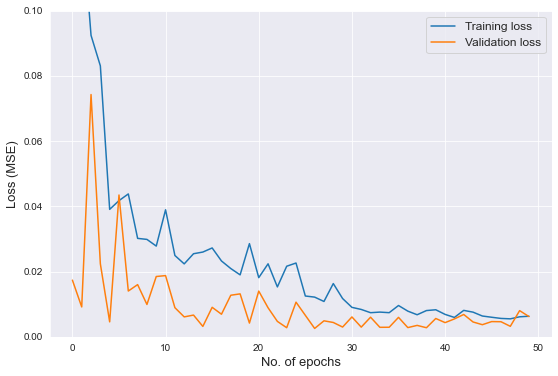

In [237]:
plt.figure(figsize=(9,6))
sns.set_style("darkgrid")
plt.ylabel("Loss (MSE)",fontsize=13)
plt.xlabel("No. of epochs",fontsize=13)
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
plt.ylim((0,0.1))
plt.legend(fontsize='large');

In [59]:
forecast1 = model.predict(trainX[-50:])

In [93]:
forecast1.shape

(50, 11)

In [63]:
forecast = forecast1[:,0]

In [87]:
forecast.shape

(50,)

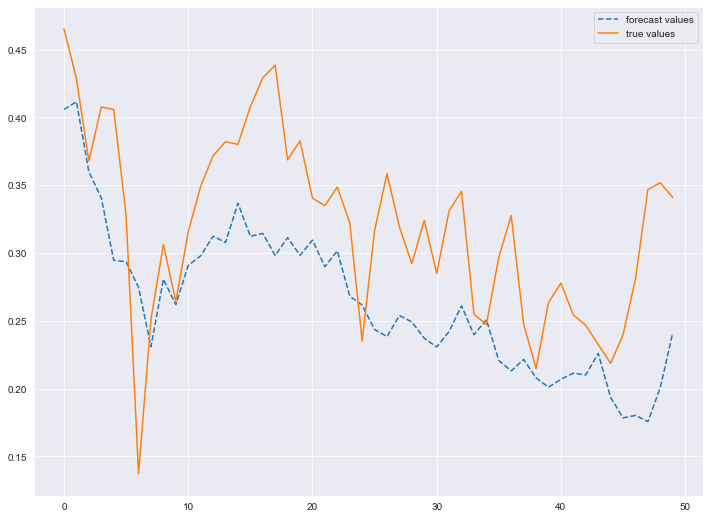

In [64]:
plt.figure(figsize=(12,9))
sns.set_style("darkgrid")
plt.plot(forecast,linestyle="--",label="forecast values")
plt.plot(trainY[-50:],label="true values")
plt.legend()

In [95]:
y_pred = scaler.inverse_transform(forecast1)[:,0]

In [ ]:
y_true = scaler.inverse_transform(train)

In [100]:
y_pred.shape

(50,)

### Rescaling to original scale

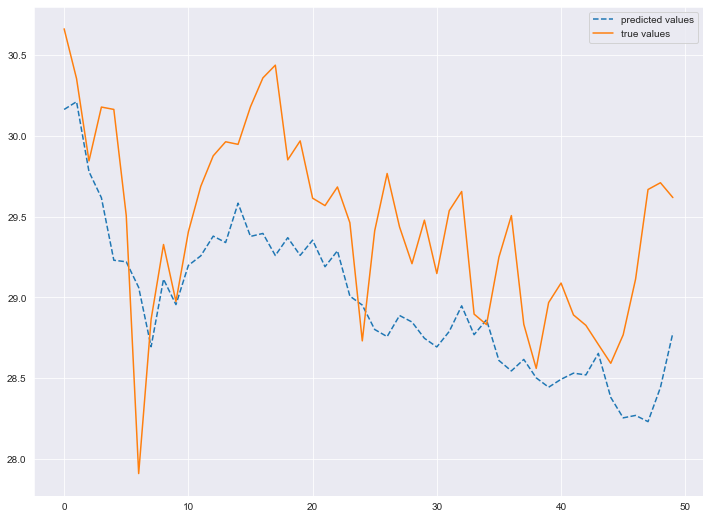

In [106]:
plt.figure(figsize=(12,9))
sns.set_style("darkgrid")
plt.plot(y_pred,linestyle="--",label="predicted values")
plt.plot(df_for_training[-50:].AVGT.to_numpy(),label="true values")
plt.legend()

In [65]:
model.save("Avg_t_our_data_model")

INFO:tensorflow:Assets written to: Avg_t_our_data_model\assets


## Future predictions for 10 days

In [154]:
future_predictions = []  ## list of future values

current_batch = trainX[-1:]   ## using the last 7 days of past to predict the next future day

for _ in range(10):    ## iterating the same for 10 days future forecast
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)
    
    print("Current_pred: {}".format(current_pred))
    # append the prediction into the array
    future_predictions.append(current_pred[0][0])
    
    # use the prediction to update the batch and remove the first value
    current_batch= np.delete(current_batch,0,axis=1)
    current_pred = current_pred.reshape((1,1,11))
    current_batch = np.append(current_batch,current_pred,axis=1)
    
    print("Current_batch: {}".format(current_batch))

Current_pred: [[0.24104923 0.23418576 0.24210456 0.22718582 0.24306166 0.22972861
  0.24823606 0.23386484 0.21754816 0.22987458 0.23775384]]
Current_batch: [[[0.23253791 0.99588436 0.99464096 0.99566241 0.15246508 0.33480279
   0.40862783 0.17187225 0.52906879 0.20439785 0.24833708]
  [0.21864384 0.99643671 0.99580759 0.99693175 0.14652248 0.29331628
   0.51782872 0.03919074 0.53006836 0.2015688  0.25217379]
  [0.23963659 0.99505781 0.99509738 0.99477783 0.1793117  0.30668354
   0.5889844  0.25143685 0.53113042 0.19955376 0.25599235]
  [0.28074752 0.99241533 0.99137124 0.99268539 0.23418394 0.33082556
   0.62798472 0.174852   0.5318902  0.19836692 0.25979131]
  [0.34681217 0.99304308 0.9915601  0.99405391 0.28760303 0.40109781
   0.54170646 0.19748238 0.53202555 0.19798722 0.26356924]
  [0.35180828 0.99443055 0.99318906 0.99456561 0.3547981  0.360531
   0.62893983 0.30131789 0.53122499 0.19838477 0.26732469]
  [0.24104923 0.23418576 0.24210456 0.22718582 0.24306166 0.22972861
   0.2482

Current_pred: [[0.24192941 0.26178956 0.22337928 0.2847167  0.24040872 0.2717152
  0.2122792  0.23032075 0.3181539  0.2711387  0.2728301 ]]
Current_batch: [[[0.2648468  0.26530129 0.29478684 0.28214303 0.28097528 0.25292286
   0.29609644 0.24856591 0.26156381 0.26552269 0.28342888]
  [0.23677391 0.24896115 0.24410769 0.27347806 0.24226803 0.24895671
   0.23526758 0.22771418 0.2837728  0.25560328 0.26277468]
  [0.18467075 0.20052189 0.1706337  0.2193158  0.18008953 0.20956489
   0.15824258 0.17822498 0.24883839 0.20851067 0.20527855]
  [0.16703045 0.18142956 0.15962753 0.19924346 0.16713035 0.18742487
   0.15079236 0.16029608 0.22000757 0.18850133 0.18822011]
  [0.18244267 0.19390231 0.17289206 0.21053532 0.18335503 0.19751927
   0.1666652  0.17133641 0.22930738 0.19878152 0.2061083 ]
  [0.21251416 0.22725767 0.20143721 0.24717459 0.21439582 0.2322838
   0.19438368 0.20058137 0.2693409  0.23381147 0.24096557]
  [0.24192941 0.26178956 0.22337928 0.2847167  0.24040872 0.27171519
   0.2122

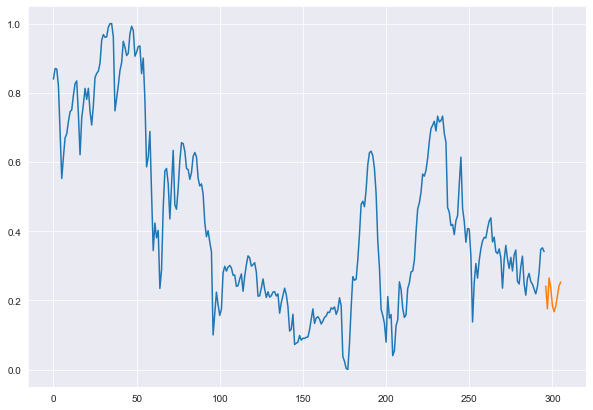

In [155]:
plt.figure(figsize=(10,7))
plt.plot(trainY[:],label= "true values")
# plt.xlim((290,310))
plt.plot(len(trainY[:])+np.arange(0,10,1),future_predictions)

In [199]:
future_predictions

[0.24104923,
 0.17550695,
 0.2648468,
 0.23677391,
 0.18467075,
 0.16703045,
 0.18244267,
 0.21251416,
 0.24192941,
 0.25299716]

In [158]:
new = np.asarray(future_predictions,dtype=np.float64)

In [191]:
new  = new.reshape((10,1))

In [192]:
new.shape

(10, 1)

In [196]:
prediction_copies = np.repeat(new, 11, axis=1)
# y_pred_future = scaler.inverse_transform(prediction_copies)

In [197]:
# final_Pred_data = pd.DataFrame(prediction_copies)

In [203]:
prediction_copies.shape

(10, 11)

In [204]:
y_pred_future = scaler.inverse_transform(prediction_copies)

In [209]:
y_pred_future = y_pred_future[:,0]

### Future Prediction Plot

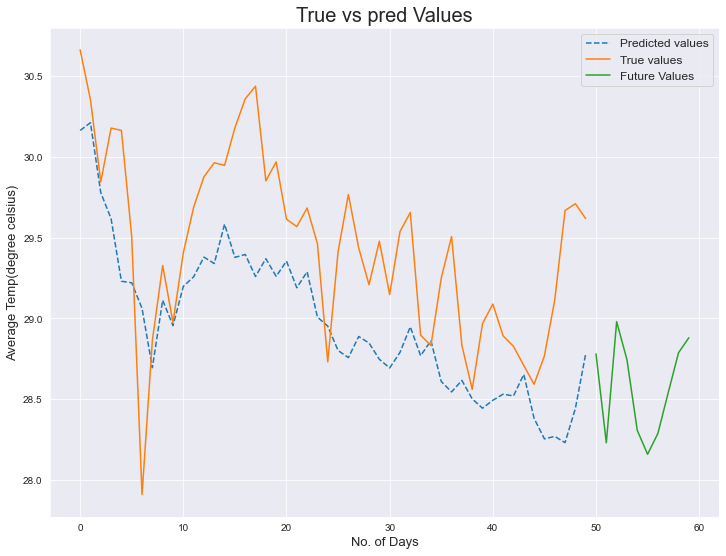

In [229]:
plt.figure(figsize=(12,9))
plt.title("True vs pred Values",fontsize=20)
plt.xlabel("No. of Days",fontsize=13)
plt.ylabel("Average Temp(degree celsius)",fontsize=13)
sns.set_style("darkgrid")
plt.plot(y_pred,linestyle="--",label="Predicted values")
plt.plot(df_for_training[-50:].AVGT.to_numpy(),label="True values")
plt.plot(len(df_for_training[-50:])+np.arange(0,10,1),y_pred_future,label="Future Values")
plt.legend(fontsize = 'large');

### Mean Squared Error on true and predicted values

`at original scale`

In [217]:
from sklearn.metrics import mean_squared_error

In [222]:
mean_squared_error(df_for_training[-50:].AVGT.to_numpy(),y_pred)

0.3900827981366409